## The Framingham Heart Study. EDA

### Connecting libraries and scripts

In [1]:
# 1. Core libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# 2. Constants
custom_palette = ["#C33C54", "#254E70", "#37718E", "#8EE3EF", "#AEF3E7"]

### Settings

In [2]:
# 1. General settings
pd.set_option('display.max_columns', 100)

%matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

matplotlib.rcParams['figure.figsize'] = 15, 7
matplotlib.rcParams['axes.titlesize'] = 13
matplotlib.rcParams['font.size'] = 10

sns.set_theme()

# 2. Warnings
import warnings
warnings.filterwarnings('ignore')

Using matplotlib backend: <object object at 0x10cce49b0>


### Reduce memory usage

In [3]:
import reduce_mem_usage

### Functions

**Function normalizes target variable plot.**<br>

In [4]:
def barplot_norm(df: pd.DataFrame, column: str) -> None:
    '''
    Function plots the normalized target variable.
        
    Parameters
    ----------
    - df - pd.DataFrame.
    - column - str.

    Returns
    -------
    - None
    '''
    norm_target = (df[column].value_counts(
        normalize=True).mul(100).rename('percent').reset_index())

    # norm_target = pd.DataFrame(norm_target).reset_index()

    plt.figure(figsize=(10, 7))
    ax = sns.barplot(x=column,
                     y='percent',
                     data=norm_target,
                     palette=custom_palette)

    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height())

        # Текст.
        ax.annotate(
            percentage,
            # Координата xy.
            (p.get_x() + p.get_width() / 2., p.get_height()),

            # Центрирование.
            ha='center',
            va='center',
            xytext=(0, 10),

            # Точка смещения относительно координаты.
            textcoords='offset points')

    sns.color_palette()

    plt.title(column.upper())
    plt.xlabel(column.upper())
    plt.ylabel('Percent')

    plt.show()

**Function builds a barplot with normalized data with the output of values on a graph.**<br>

In [5]:
def barplot_group(df_data: pd.DataFrame, col_main: str,
                  col_group: str) -> None:
    """
    Constructing a barplot with normalized data and displaying the values on a graph.
    """
    # Глобальные настройки.
    # plt.figure(figsize=(15, 6))

    data = (df_data.groupby(
        [col_group])[col_main].value_counts(normalize=True).rename(
            'percentage').mul(100).reset_index().sort_values(col_group))

    ax = sns.barplot(x=col_main,
                     y='percentage',
                     hue=col_group,
                     data=data,
                     palette=custom_palette)

    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height())

        ax.annotate(
            # Текст.
            percentage,

            # Координата xy.
            (p.get_x() + p.get_width() / 2., p.get_height()),

            # Центрирование.
            ha='center',
            va='center',
            xytext=(0, 7),

            # Точка смещения относительно координаты.
            textcoords='offset points',
            fontsize=10)

    sns.color_palette()

    plt.title(col_main.upper() + ' - ' + col_group.upper())
    plt.ylabel('Percentage')
    plt.xlabel(col_main.upper())

    plt.show()

**Function builds displot and boxplot.**<br>

In [6]:
def displot_boxplot_graph(df_data: pd.DataFrame, col_main: str,
                          col_group: str) -> None:
    """
    Constructing a dispot and boxplot in 2 different areas.
    """
    fig, axes = plt.subplots(ncols=2)

    sns.kdeplot(
        data={
            "no CVD": df_data[df_data[col_main] == 0][col_group],
            "CVD": df_data[df_data[col_main] == 1][col_group]
        },

        # common_norm=False - независимая нормализация каждого подмножества.
        # Нормируем, так как у нас есть дисбаланм классов в целевой переменной.
        common_norm=False,
        palette=custom_palette,
        ax=axes[0])

    axes[0].set_title(col_group + ' Distribution')
    axes[0].set_xlabel(col_group)
    axes[0].set_ylabel('Dentsity')

    sns.boxplot(x=col_main,
                y=col_group,
                data=df,
                palette=custom_palette,
                ax=axes[1])

    axes[1].set_title(col_group.upper() + ' Boxplot')
    axes[1].set_ylabel(col_group.upper())
    axes[1].set_xlabel(col_main.upper())

    plt.show()

### Data import

In [7]:
df = pd.read_csv('csv/preprocessed_dataset.csv')

### Exploratory data analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4434 entries, 0 to 4433
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RANDID           4434 non-null   int64  
 1   TOTCHOL          4434 non-null   float64
 2   AGE              4434 non-null   float64
 3   SYSBP            4434 non-null   float64
 4   DIABP            4434 non-null   float64
 5   CIGPDAY          4434 non-null   float64
 6   BMI              4434 non-null   float64
 7   HEARTRTE         4434 non-null   float64
 8   GLUCOSE          4434 non-null   float64
 9   HDLC             4434 non-null   float64
 10  LDLC             4434 non-null   float64
 11  SEX              4434 non-null   int64  
 12  educ             4434 non-null   float64
 13  CVD              4434 non-null   int64  
 14  AGE_1            4434 non-null   int64  
 15  AGE_2            4434 non-null   int64  
 16  AGE_3            4434 non-null   int64  
 17  CURSMOKE_1    

**Reducing memory usage.**<br>

In [9]:
df = reduce_mem_usage.reduce_mem_usage(df)

Memory usage of dataframe is 1.49 MB
Memory usage after optimization is: 0.38 MB
Decreased by 74.7%


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4434 entries, 0 to 4433
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RANDID           4434 non-null   int32  
 1   TOTCHOL          4434 non-null   float32
 2   AGE              4434 non-null   float32
 3   SYSBP            4434 non-null   float32
 4   DIABP            4434 non-null   float32
 5   CIGPDAY          4434 non-null   float32
 6   BMI              4434 non-null   float32
 7   HEARTRTE         4434 non-null   float32
 8   GLUCOSE          4434 non-null   float32
 9   HDLC             4434 non-null   float32
 10  LDLC             4434 non-null   float32
 11  SEX              4434 non-null   int8   
 12  educ             4434 non-null   float32
 13  CVD              4434 non-null   int8   
 14  AGE_1            4434 non-null   int8   
 15  AGE_2            4434 non-null   int8   
 16  AGE_3            4434 non-null   int8   
 17  CURSMOKE_1    

In [11]:
df.iloc[:, 1:].describe()

,TOTCHOL,AGE,SYSBP,DIABP,CIGPDAY,BMI,HEARTRTE,GLUCOSE,HDLC,LDLC,SEX,educ,CVD,AGE_1,AGE_2,AGE_3,CURSMOKE_1,CURSMOKE_2,CURSMOKE_3,DIABETES_1,DIABETES_2,DIABETES_3,BPMEDS_1,BPMEDS_2,BPMEDS_3,PREVCHD_1,PREVCHD_2,PREVCHD_3,PREVAP_1,PREVAP_2,PREVAP_3,PREVMI_1,PREVMI_2,PREVMI_3,PREVSTRK_1,PREVSTRK_2,PREVSTRK_3,PREVHYP_1,PREVHYP_2,PREVHYP_3,CVD_BY_PERIOD_1,CVD_BY_PERIOD_2,CVD_BY_PERIOD_3
count,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.00000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000
mean,241.880417,54.795219,136.737091,83.473328,8.438036,25.926029,76.769737,83.354248,48.186737,173.966568,0.561570,1.962337,0.260938,49.925801,49.122688,44.631258,0.491881,0.38949,0.252819,0.027289,0.034957,0.057285,0.032476,0.084348,0.104195,0.043753,0.064953,0.081191,0.033153,0.049617,0.058638,0.019396,0.029319,0.035634,0.007217,0.011502,0.015562,0.322508,0.441813,0.440911,0.066306,0.044655,0.117501
std,41.519234,8.437195,21.237980,10.827291,11.819088,4.044971,10.872086,22.648750,7.662138,23.739326,0.496251,1.019185,0.439196,8.676929,19.344510,27.670730,0.499990,0.48769,0.434677,0.162943,0.183692,0.232412,0.177278,0.277938,0.305548,0.204568,0.246470,0.273159,0.179056,0.217176,0.234972,0.137926,0.168718,0.185396,0.084655,0.106641,0.123786,0.467489,0.496659,0.496552,0.248844,0.206568,0.322053
min,107.000000,35.000000,83.500000,48.000000,0.000000,15.960000,44.000000,43.000000,10.000000,60.000000,0.000000,1.000000,0.000000,32.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,214.000000,48.000000,121.500000,76.000000,0.000000,23.232500,70.000000,74.000000,47.000000,168.000000,0.000000,1.000000,0.000000,42.000000,46.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,240.000000,54.000000,133.000000,82.000000,0.000000,25.520000,75.000000,79.500000,48.000000,173.750000,1.000000,2.000000,0.000000,49.000000,53.000000,55.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,266.000000,62.000000,149.000000,90.000000,20.000000,28.040001,84.000000,87.000000,49.000000,178.000000,1.000000,3.000000,1.000000,57.000000,61.000000,64.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,614.000000,75.000000,265.000000,141.000000,70.000000,56.799999,140.000000,394.000000,114.000000,565.000000,1.000000,4.000000,1.000000,70.000000,76.000000,81.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Correlation.**<br>

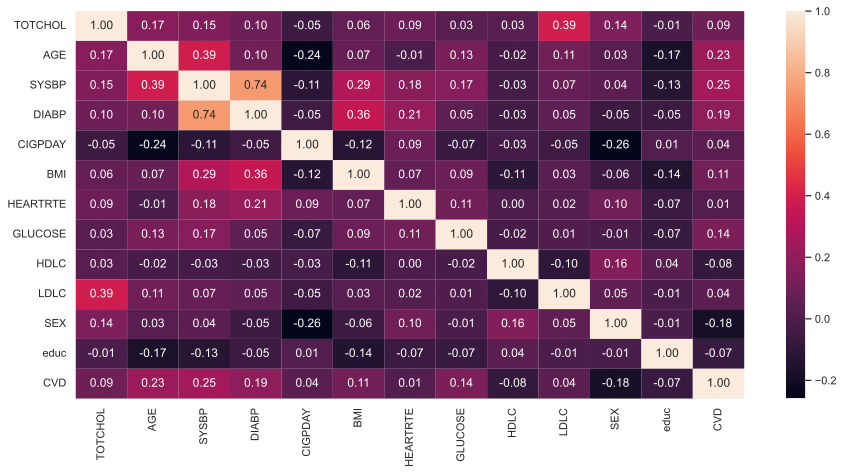

In [12]:
features = df[[
    'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CIGPDAY', 'BMI', 'HEARTRTE',
    'GLUCOSE', 'HDLC', 'LDLC', 'SEX', 'educ', 'CVD'
]]

sns.heatmap(features.corr(method='pearson'), annot=True, fmt='.2f')
plt.show()

<div class="alert alert-block alert-info"> 
<b>Conclusion</b><br>
- We do not observe any obvious linear correlation in the features.<br>
</div>

**Target variable.**<br>
Let's look at the target variable - CVD.<br>
0 - no CVD.<br>
1 - CVD.<br>

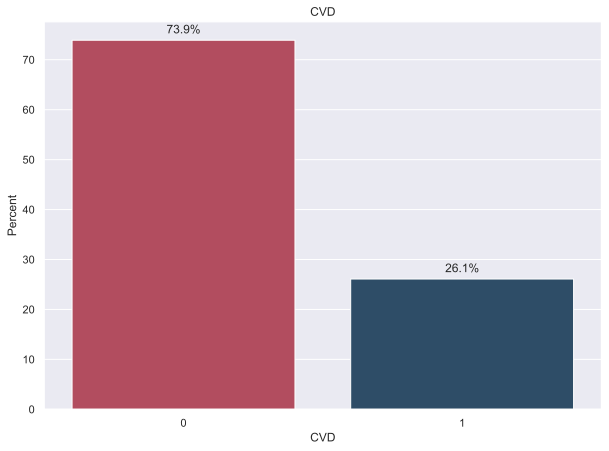

In [13]:
barplot_norm(df, 'CVD')

<div class="alert alert-block alert-info"> 
<b>Conclusion</b><br>
- We observe an imbalance of classes.<br>
- Much fewer people have developed CVD.<br>
</div>

**Gender.**<br>
Let's look at the gender distribution.<br>
SEX:<br>
0 - men.<br>
1 - women.<br>

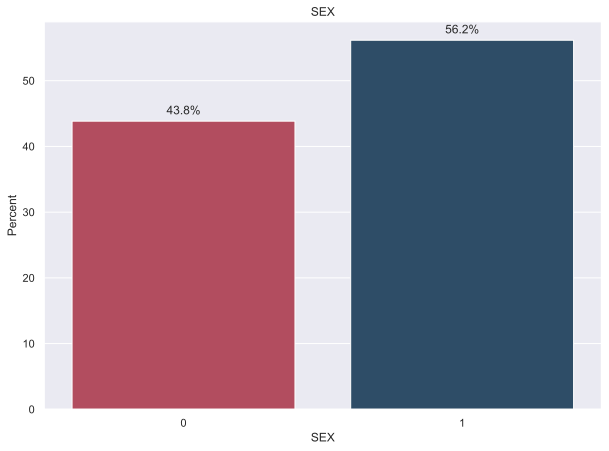

In [14]:
barplot_norm(df, 'SEX')

<div class="alert alert-block alert-info"> 
<b>Conclusion</b><br>
- We can see that the number of women predominates.<br>
</div>

**Education.**<br>
Let's look at the education levels.<br>
Education:<br>
1 = 0-11 years.<br>
2 = High School Diploma, GED.<br>
3 = Some College, Vocational School.<br>
4 = College (BS, BA) degree or more.<br>

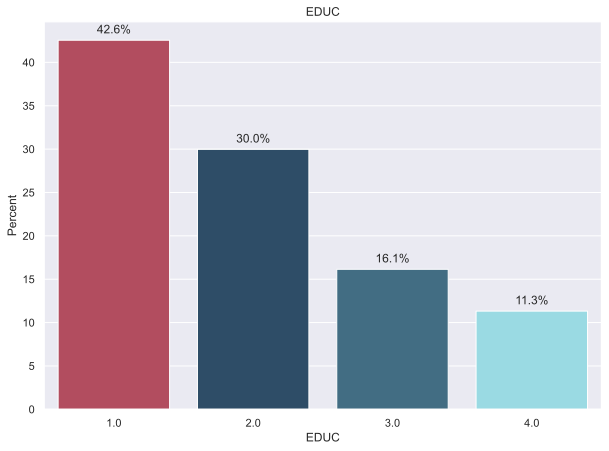

In [15]:
barplot_norm(df, 'educ')

<div class="alert alert-block alert-info"> 
<b>Conclusion</b><br>
- 0-11 years - 42.6%.<br>
- High School Diploma, GED - 30%.<br>
- Some College, Vocational School - 16.1%.<br>
- College (BS, BA) degree or more - 11.3%.<br>
</div>

**Education and Age.**<br>
Let's look at education by age.<br>

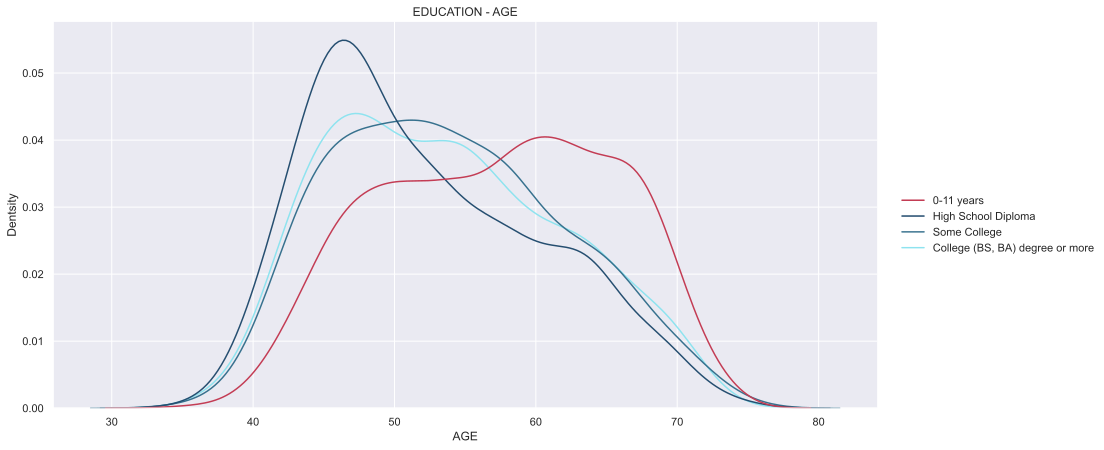

In [16]:
sns.displot(
    {
        "0-11 years": df[df.educ == 1].AGE,
        "High School Diploma": df[df.educ == 2].AGE,
        "Some College": df[df.educ == 3].AGE,
        "College (BS, BA) degree or more": df[df.educ == 4].AGE,
    },
    kind="kde",
    common_norm=False,
    height=6,
    aspect=2.1,
    palette=custom_palette)

plt.title('EDUCATION - AGE')
plt.xlabel('AGE')
plt.ylabel('Dentsity')

plt.show()

<div class="alert alert-block alert-info"> 
<b>Conclusion</b><br>
- The least educated people are the oldest.<br>
- And then we will see that they are at risk of developing the disease.<br>
</div>

**Gender and Age.**<br>
Let's look at the gender and age distribution.<br>
SEX:<br>
0 - men.<br>
1 - women.<br>

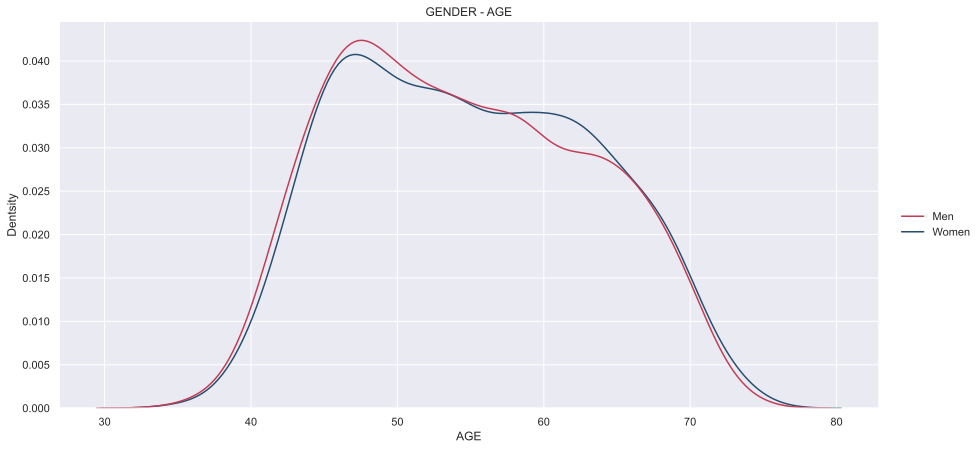

In [17]:
sns.displot({
    "Men": df[df.SEX == 0].AGE,
    "Women": df[df.SEX == 1].AGE,
},
            kind="kde",
            common_norm=False,
            height=6,
            aspect=2.1,
            palette=custom_palette)

plt.title('GENDER - AGE')
plt.xlabel('AGE')
plt.ylabel('Dentsity')

plt.show()

<div class="alert alert-block alert-info"> 
<b>Conclusion</b><br>
- There is no significant difference in the age distribution depending on gender.<br>
But we see little difference at about 60 years of age. At this age there are slightly more women than men.<br>
</div>

**Gender and CVD.**<br>
Let's see who develops the disease more often, men or women.<br>
SEX:<br>
0 - men.<br>
1 - women.<br>
<br>
CVD:<br>
0 - no CVD.<br>
1 - CVD.<br>

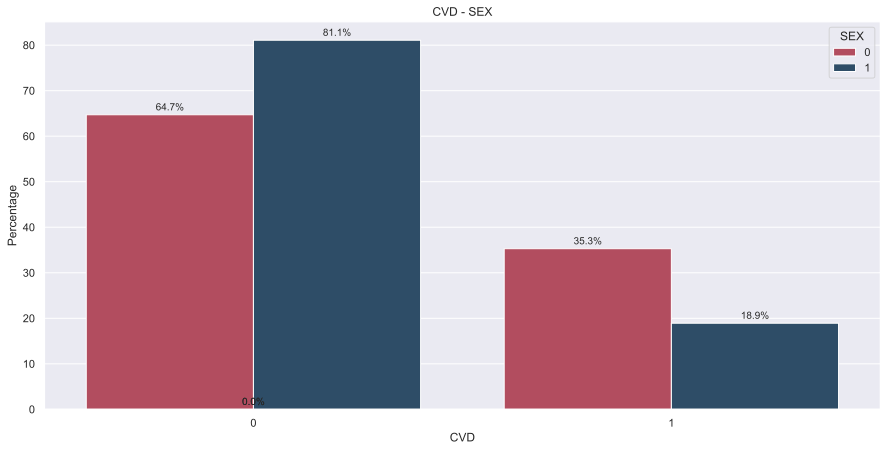

In [18]:
barplot_group(df, 'CVD', 'SEX')

<div class="alert alert-block alert-info"> 
<b>Conclusion</b><br>
- We observe that men develop the disease slightly more often than women.<br>
</div>

**Age and CVD.**<br>
Let's see if the age affects the development of the disease.<br>

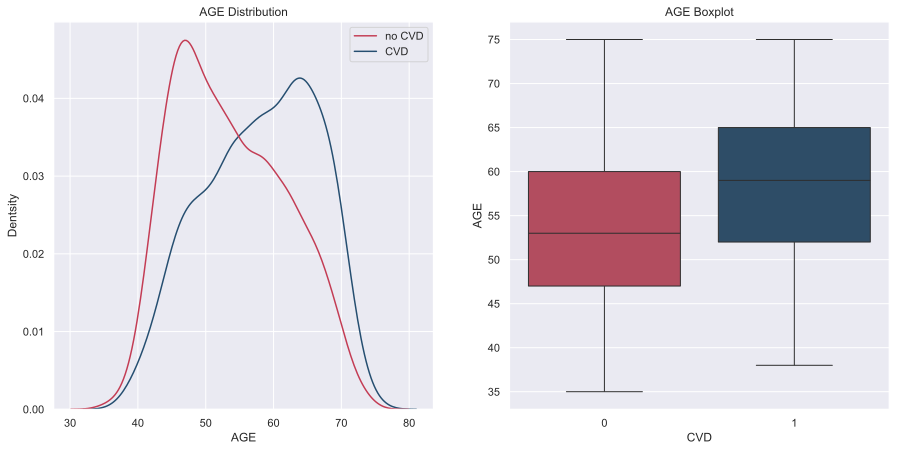

In [19]:
displot_boxplot_graph(df, 'CVD', 'AGE')

<div class="alert alert-block alert-info"> 
<b>Conclusion</b><br>
- Age influences the development of the disease.<br>
According to the graphs, we see that people aged 60 to 70 years have a greater risk of developing the disease than younger people.<br>
- We also concluded that men develop CVD more often than women.<br>
- We can draw a general conclusion that men aged 60 - 70 years are at serious risk.<br>
</div>

**Cholesterol and CVD.**<br>
Let's see if the level of cholesterol in the blood affects the development of the disease.<br>

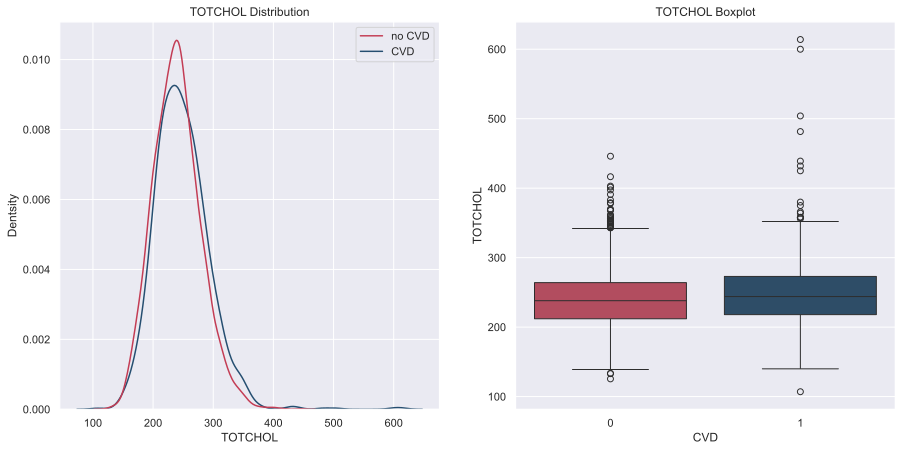

In [20]:
displot_boxplot_graph(df, 'CVD', 'TOTCHOL')

<div class="alert alert-block alert-info"> 
<b>Conclusion</b><br>
- Based on the graphs, the level of cholesterol in the blood does not affect the development of CVD.<br>
</div>

**Systolic blood pressure and CVD.**<br>
Systolic blood pressure, the top number, measures the force the heart exerts on the walls of the arteries each time it beats.<br>

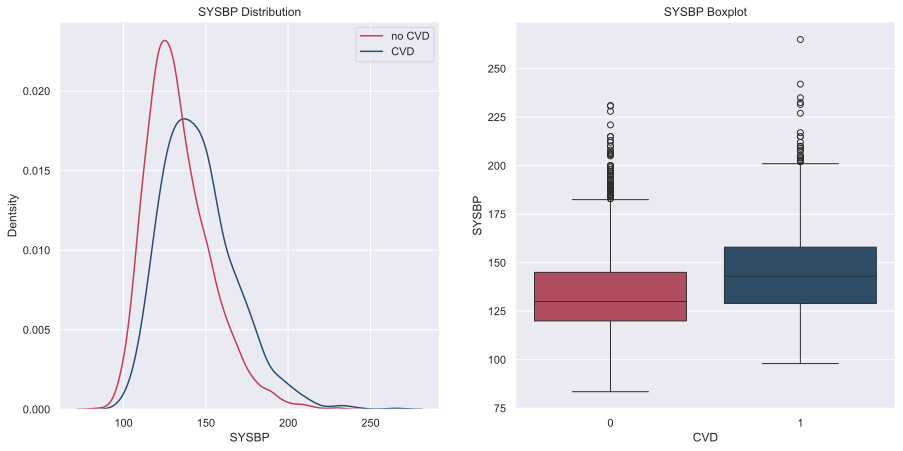

In [21]:
displot_boxplot_graph(df, 'CVD', 'SYSBP')

<div class="alert alert-block alert-info"> 
<b>Conclusion</b><br>
- The higher the systolic blood pressure, the greater the risk of developing CVD.<br>
</div>

**Diastolic blood pressure and CVD.**<br>
Diastolic blood pressure, the bottom number, measures the force the heart exerts on the walls of the arteries in between beats.<br>

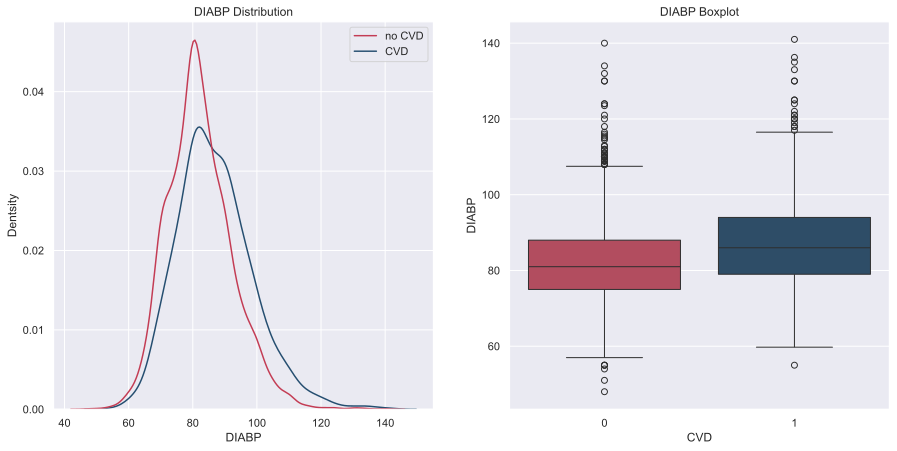

In [22]:
displot_boxplot_graph(df, 'CVD', 'DIABP')

<div class="alert alert-block alert-info"> 
<b>Conclusion</b><br>
- The higher the diastolic blood pressure, the greater the risk of developing CVD.<br>
</div>

**Cigarettes per day and CVD.**<br>
Let's see if cigarette smoking is associated with CVD.<br>

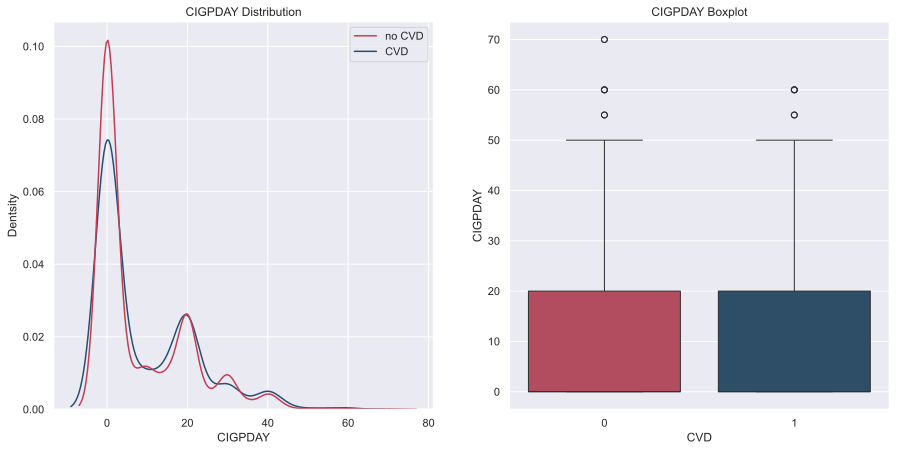

In [23]:
displot_boxplot_graph(df, 'CVD', 'CIGPDAY')

<div class="alert alert-block alert-info"> 
<b>Conclusion</b><br>
- Based on the graphs, the distribution of the number of cigarettes per day is bimodal.<br>
- The number of cigarettes smoked per day clearly does not influence the development of CVD.<br>
</div>

**BMI and CVD.**<br>
Body mass index (BMI) is a value derived from the mass (weight) and height of a person.<br>
The BMI is defined as the body mass divided by the square of the body height,<br>
and is expressed in units of kg/m2, resulting from mass in kilograms (kg) and height in metres (m).<br>

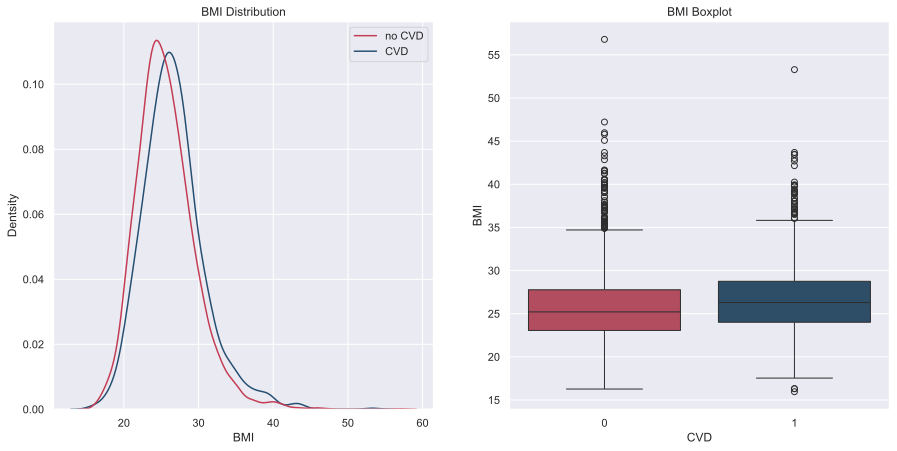

In [24]:
displot_boxplot_graph(df, 'CVD', 'BMI')

<div class="alert alert-block alert-info"> 
<b>Conclusion</b><br>
- We observe that the BMI is slightly higher in those who develop the disease.<br>
</div>

**Heart rate and CVD.**<br>
Heart rate (or pulse rate) is the frequency of the heartbeat measured<br>
by the number of contractions of the heart per minute (beats per minute, or bpm).<br>

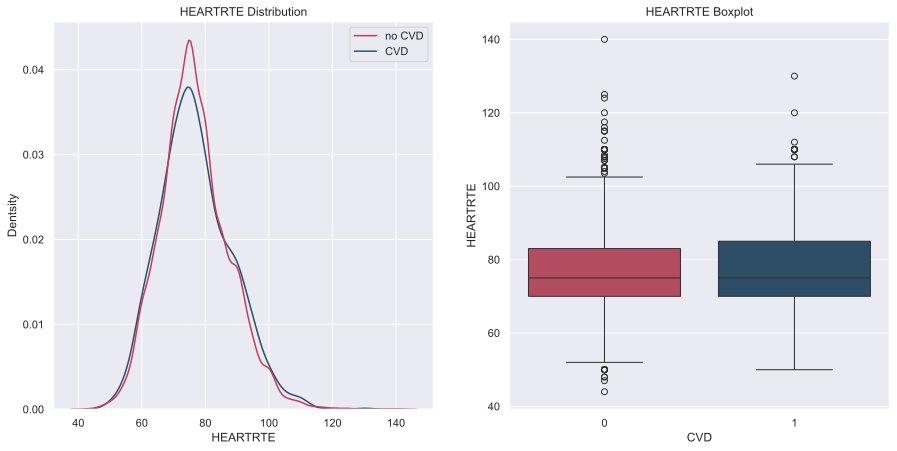

In [25]:
displot_boxplot_graph(df, 'CVD', 'HEARTRTE')

<div class="alert alert-block alert-info"> 
<b>Conclusion</b><br>
- The heart rate clearly does not influence the development of CVD.<br>
</div>

**Glucose and CVD.**<br>
Let's see if blood glucose levels affect the development of CVD.<br>

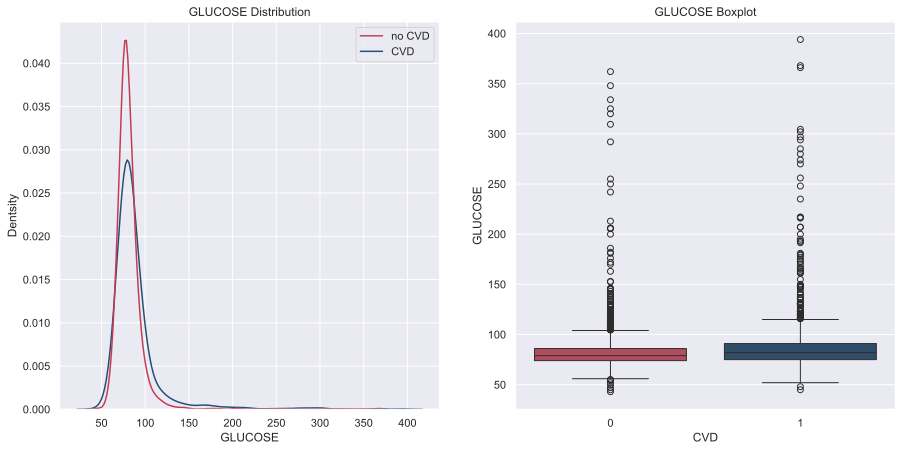

In [26]:
displot_boxplot_graph(df, 'CVD', 'GLUCOSE')

<div class="alert alert-block alert-info"> 
<b>Conclusion</b><br>
- The glucose level does not influence the development of CVD.<br>
</div>

**Final conclusions.**<br>
1. There is imbalance of classes in target variable. Much fewer people have developed CVD.<br>
<br>
2. The number of women in Framigham Heart Study predominates.<br>
<br>
3. Education levels:
    - 0-11 years - 42.6%.<br>
    - High School Diploma, GED - 30%.<br>
    - Some College, Vocational School - 16.1%.<br>
    - College (BS, BA) degree or more - 11.3%.<br>
<br>
4. The least educated people are the oldest.<br>
And then we will see that they are at risk of developing the disease.<br>
<br>
5. There is no significant difference in the age distribution depending on gender.<br>
But we see little difference at about 60 years of age. At this age there are slightly more women than men.<br>
<br>
6. Men develop the disease slightly more often than women.<br>
<br>
7. General conclusion that men aged 60 - 70 years are at serious risk.<br>
<br>
8. The level of cholesterol in the blood does not affect the development of CVD.<br>
<br>
9. The higher the systolic blood pressure, the greater the risk of developing CVD.<br>
<br>
10. The higher the diastolic blood pressure, the greater the risk of developing CVD.<br>
<br>
11. The number of cigarettes smoked per day clearly does not influence the development of CVD.<br>
<br>
12. The BMI is slightly higher in those who develop the disease.<br>
<br>
13. The glucose level does not influence the development of CVD.<br>